In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

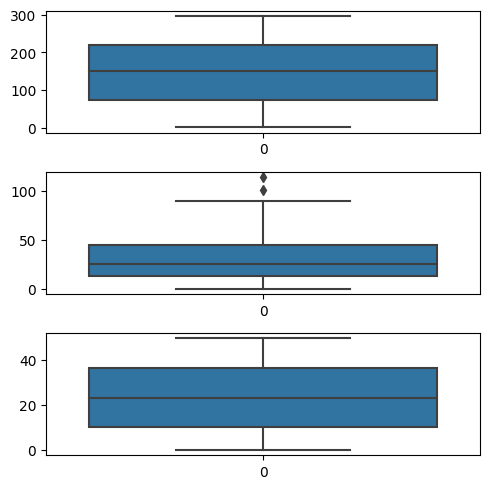

In [10]:
fig,axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<AxesSubplot: xlabel='Newspaper', ylabel='Density'>

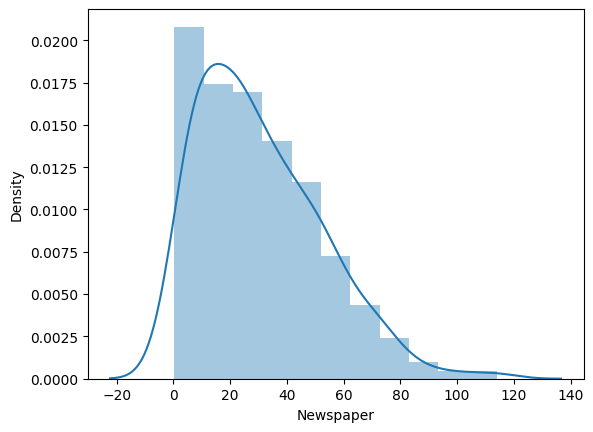

In [11]:
sns.distplot(df['Newspaper'])

In [12]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [13]:
lower_bright = df['Newspaper'].quantile(0.25) - (iqr*1.5)
upper_bright = df['Newspaper'].quantile(0.75) + (iqr*1.5)
print(lower_bright)
print(upper_bright)

-35.775000000000006
93.625


In [14]:
data = df.copy()

In [15]:
data.loc[data['Newspaper']>=93,'Newspaper']=93

<AxesSubplot: >

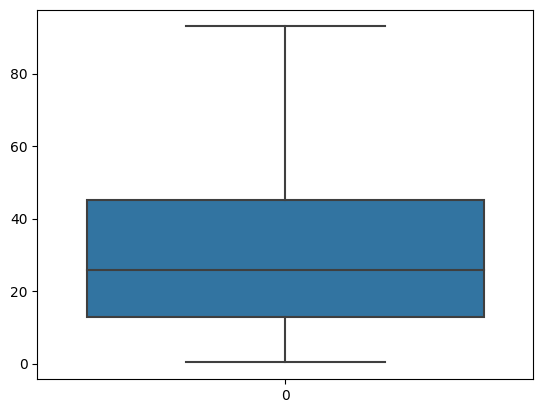

In [16]:
sns.boxplot(data['Newspaper'])

<AxesSubplot: >

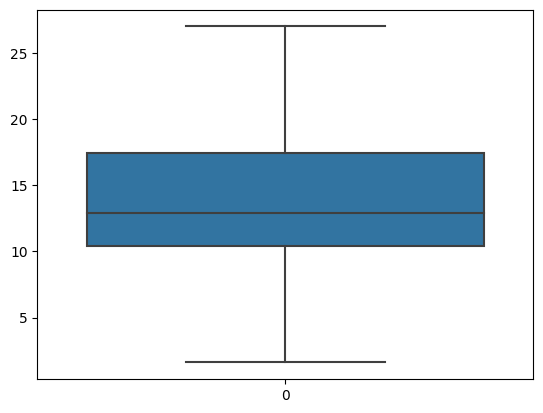

In [17]:
sns.boxplot(data['Sales'])

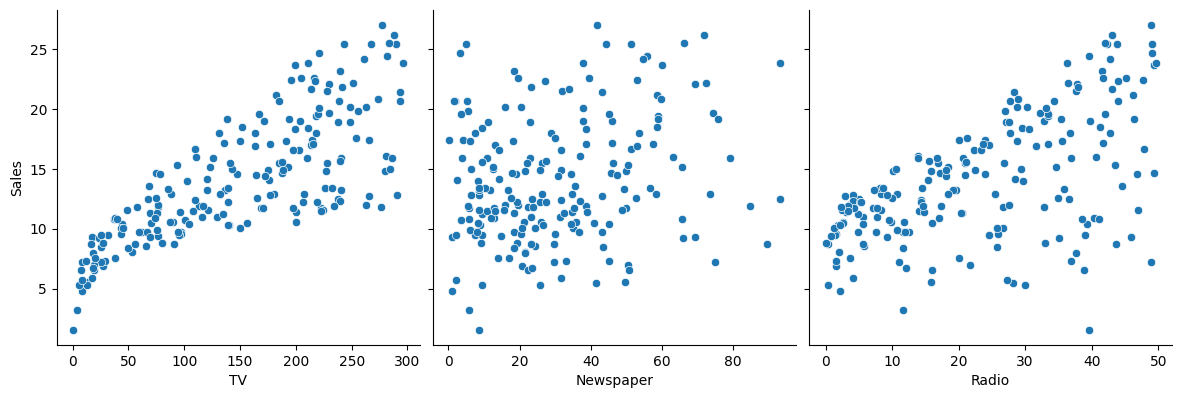

In [18]:
sns.pairplot(data, x_vars=['TV','Newspaper','Radio'],
            y_vars='Sales',height=4,aspect=1 , kind='scatter')
plt.show()

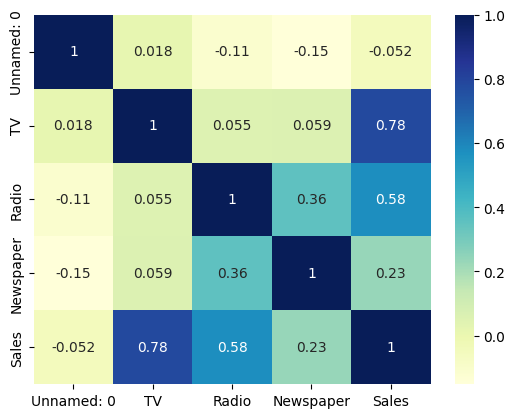

In [19]:
sns.heatmap(data.corr(),cmap='YlGnBu', annot=True)
plt.show()

In [20]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [21]:
print(important_features)

['TV', 'Radio', 'Sales']


In [22]:
x = data['TV']
y = data['Sales']

In [23]:
x = x.values.reshape(-1,1)

In [24]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [25]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [26]:
print(x.shape,y.shape)

(200, 1) (200,)


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33)

In [28]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [29]:
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [30]:
knn = KNeighborsRegressor().fit(x_train,y_train)
knn

KNeighborsRegressor()

In [31]:
knn_train_pred = knn.predict(x_train)

In [32]:
knn_test_pred = knn.predict(x_test)

In [33]:
print(knn_train_pred, knn_test_pred)

[ 7.72  6.56 18.34 15.4  15.28 12.08 19.66 19.02 18.34 19.48 17.54 15.4
 15.28 15.28 18.86 12.08 19.78 19.76 13.94 16.58 16.28  9.8  13.24 17.86
 18.3  18.72 11.22 17.52 11.5  15.92 10.12 16.   18.82 20.2  10.76  9.56
  8.14 16.68  9.84 19.36 14.16 18.34 18.72 16.   17.66 16.7   7.72 14.16
 17.54  8.96  9.3   8.72 19.42 15.4  11.22 10.36 12.   12.08 19.42  7.72
 15.58 18.34 15.58 10.78 19.48  4.62  5.36 18.72 17.66  7.18 11.32  7.18
  7.18 19.76  7.38  9.7   4.62 18.86 10.78  9.56 18.6  14.46 11.5  10.2
  9.3  16.52 12.08 17.46 19.36  9.84 14.78 16.58 10.76 18.86  9.68 18.72
 11.22 13.24  8.14 14.16 17.54 16.26 18.86 16.   10.36  9.8  15.34 19.96
 15.6   6.52  9.84 10.56 20.4  16.52 16.   18.34 12.54  6.56 18.72 15.28
 11.22 19.66 11.62 11.32 10.2  14.24 19.24  7.18 21.22 16.28  4.62  9.72
 21.22 15.92] [10.2  18.86 19.48 14.9   5.84  5.36 16.   11.5  10.78  9.36 13.54  9.8
 10.78  5.36 20.28 19.42 11.26 13.24 14.98 12.    5.36 14.76 18.86 12.54
 19.48 14.78 19.48 14.76 19.02 12.08  8.

In [34]:
Results = pd.DataFrame(columns=['Model','Train R2','Test R2','Test RMSE','Variance'])

In [35]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({'Model':'K-Nearest Neighbors','Train R2':r2_train,'Test R2':r2,'Test RMSE':rmse,'Variance':variance},ignore_index=True)
print('R2:',r2)
print('RMSE:',rmse)

R2: 0.5328330239402994
RMSE: 3.398856313883281


In [36]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.682339,0.532833,3.398856,0.149506


In [37]:
svr = SVR().fit(x_train,y_train)
svr

SVR()

In [38]:
svr_train_pred = svr.predict(x_train)
svr_test_pred = svr.predict(x_test)

In [39]:
print(svr_train_pred,svr_test_pred)

[ 8.19250355  8.11493034 17.67808825 12.87352889 15.30076206 10.28552084
 17.34738367 17.85060822 17.64850244 16.74302725 16.06119701 12.96687238
 15.23706024 13.63403646 17.87412054 10.34113227 17.50630291 17.36968906
 17.65274657 16.92026376 16.2144856   8.80198262 12.38241606 17.09904929
 17.04845042 17.74529645 10.92092779 17.56309773 11.85693588 17.61332622
  9.17979367 16.51338329 17.45493796 17.38767041 11.19108691  8.98076023
  8.34965913 15.62643598 11.40772445 17.24831932 13.34756124 17.76402063
 17.73948408 16.48879257 17.54367234 14.43733845  8.18627821 13.42726792
 15.93702245  9.63449907  9.4952719   8.43279147 17.11258605 12.99999999
 10.85878517  9.03350743 12.01029309 10.33684882 17.21784173  8.19250355
 15.03883752 17.68686117 14.84497589  9.97606417 16.77227444  8.00619695
  8.04707846 17.72350734 17.55759775  8.24528065 10.50463954  8.22710954
  8.22487835 17.37608825  8.20735493  8.57572202  8.01634375 17.90227927
 10.09420229  8.97701861 17.25975831 12.67310682 11

In [40]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({'Model':'Support Vector Machine','Train R2':r2_train,'Test R2':r2,'Test RMSE':rmse,'Variance':variance},ignore_index=True)
print('R2:',r2)
print('RMSE:',rmse)

R2: 0.49206767048619626
RMSE: 3.544048576024281


In [41]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.682339,0.532833,3.398856,0.149506
1,Support Vector Machine,0.607425,0.492068,3.544049,0.115357


In [46]:
import statsmodels.api as sm

In [47]:
x_train_constant = sm.add_constant(x_train)

In [48]:
model = sm.OLS(y_train , x_train_constant).fit()

In [49]:
model.params

const    6.940243
x1       0.048572
dtype: float64

In [50]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     218.7
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           8.55e-30
Time:                        15:04:09   Log-Likelihood:                -348.48
No. Observations:                 134   AIC:                             701.0
Df Residuals:                     132   BIC:                             706.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9402      0.553     12.552      0.0

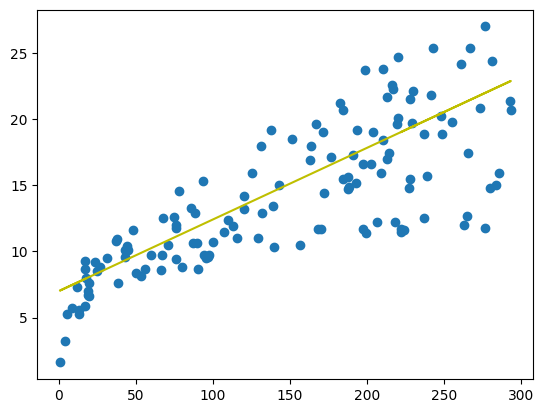

In [51]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.9955+0.0541*x_train,'y')
plt.show()

In [52]:
y_train_pred = model.predict(x_train_constant)
res = (y_train - y_train_pred)
res

192   -1.875688
108   -2.276542
33    -2.441073
73    -2.225512
153    3.739304
         ...   
103   -1.366997
130   -5.374244
170   -0.968863
28    -0.125057
174   -6.242745
Name: Sales, Length: 134, dtype: float64

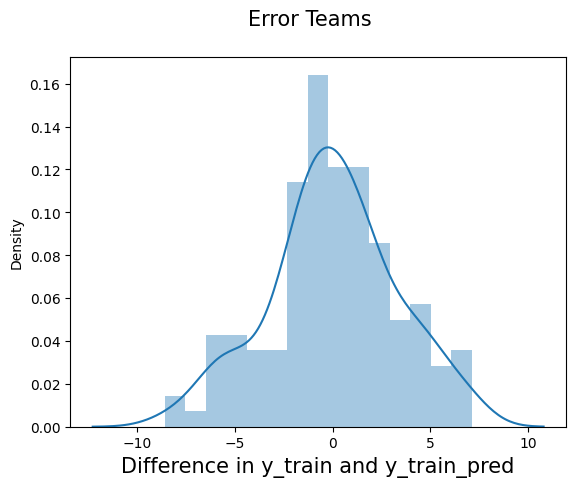

In [53]:
fig=plt.figure()
sns.distplot(res,bins = 15)
fig.suptitle('Error Teams',fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

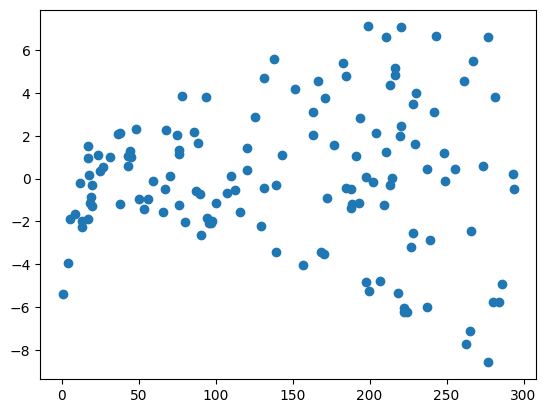

In [54]:
plt.scatter(x_train,res)
plt.show()

In [55]:
x_test_constant = sm.add_constant(x_test)
y_pred = model.predict(x_test_constant)

In [56]:
y_pred

array([11.92862881, 18.60247688, 21.33710312, 13.46351672,  7.362823  ,
        7.35796576, 16.64500907, 12.27349287, 10.26259542,  8.32941381,
       14.21153172,  8.85885299, 10.30145334,  7.31910784, 17.54845575,
       20.71537637, 10.50545743, 12.81750377, 17.90789152, 12.31720803,
        7.29482164, 13.50723188, 18.51018931, 12.63292864, 20.90966598,
       15.44527073, 21.01166802, 13.55580429, 19.26791879, 10.59774499,
        8.1836966 , 10.56860155, 19.12705882, 15.5375583 , 12.91950582,
       18.58790515, 15.72213342, 20.5745164 , 17.51445507, 12.02091638,
       21.06024043, 13.75495113, 10.60745947, 14.09495795,  9.73315623,
       10.29173886, 15.47441417, 16.4312905 , 18.33047142, 13.70152149,
       18.60247688,  8.27598417, 14.98383291, 16.61100838, 16.89758556,
       17.40273854, 18.21389766, 16.98987312, 14.21638896, 14.93040327,
       19.70021317,  9.96630376, 18.59276239,  8.15455316, 13.80352354,
       11.6129082 ])

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [58]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.2118210777574214

In [59]:
r2 = r2_score(y_test,y_pred)
r2

0.5828337050596721

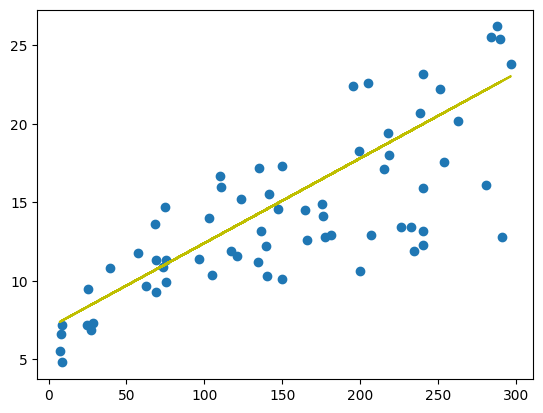

In [60]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.9955 + 0.0541*x_test,"y")
plt.show()